In [1]:
# Query, open
# Filter for clouds
#    if cloudy, query n+ith day
#    else continue
# Ensure query time is good
# If so, continue, else, wait.

In [37]:
def next_mo(date):
    mo = '0' + str(int(date[5:7]) + 1)
    if len(mo) > 2:
        mo = mo[1:]
    date = date[:5] + mo + date[7:]
    return date

def is_cloudy(img):
    #Takes Image object, returns bool if it meets 'cloudy' criteria
    k = 75 #Threshold coeff.
    
    hist = img.histogram()
    Rm = np.mean(hist[:256])
    Gm = np.mean(hist[256:512])
    Bm = np.mean(hist[512:])
    W = [hist[255], hist[511], hist[-1]]
    
    if W[0] > k*Rm or W[1] > k*Gm or W[2] > k*Bm:
        return True
    else:
        return False

In [53]:
import os, cv2, requests, base64, imageio
from PIL import Image
from io import BytesIO
import seaborn as sn
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Load lat and long csv
us_cities = pd.read_csv("us_cities_v2.csv")
us_cities

capitals = us_cities.loc[us_cities['capital']]
capitals = capitals.reset_index(drop=True)

site = "https://api.nasa.gov/planetary/earth/imagery?"
key1 = "II3XUxmGYfFKmyapNeXjrH3Os3ILNhQScjW6bbMT"
key2 = "07b9v4Pg29fysvhDf1q6x0UyOaGZxXIfryIv9PKO"

dates = ['2016-05-01', '2019-05-01']

counter = 0
for date in dates:
    for i, city in capitals.iterrows():
        date_ = date
        
        # Query API for capital image
        url = site + "lon=" + str(city['long']) + "&lat=" + str(city['lat']) + \
                  "&dim=.1&date=" + date + "&api_key=" + key1
        
        response = requests.get(url)
        print("Ok?",response.ok,'i =',i)
            
        if response.ok:
            img = Image.open(BytesIO(response.content))
            cloudy = is_cloudy(img)
            print(cloudy)
                
            attempts = 0
            while cloudy and attempts <= 4:
                #NOTE - Selects nearest date
                date = next_mo(date)
                    
                url = site + "lon=" + str(city['long']) + "&lat=" + str(city['lat']) + \
                    "&dim=.1&date=" + date + "&api_key=" + key1
                response = requests.get(url)
                    
                img = Image.open(BytesIO(response.content))
                    
                cloudy = is_cloudy(img)
                attempts += 1
                    
            if response.ok:
                img = img.resize((32,32))
                    
                name = '_' + city['city'].replace(' ','_') + '_' + date.replace('-','_') + '.png'
                img.save(name)
                date = date_
                counter += 1
                    
            if attempts > 4:
                print(city['city'], date)
                date = date_
print(counter)

Ok? True i = 0
False
Ok? True i = 1
False
Ok? True i = 2
False
Ok? True i = 3
False
Ok? True i = 4
False
Ok? True i = 5
False
Ok? True i = 6
False
Ok? True i = 7
True
Indianapolis 2016-05-01
Ok? True i = 8
False
Ok? True i = 9
False
Ok? True i = 10
True
Ok? True i = 11
False
Ok? True i = 12
False
Ok? True i = 13
False
Ok? True i = 14
True
Ok? True i = 15
False
Ok? True i = 16
False
Ok? True i = 17
False
Ok? True i = 18
False
Ok? True i = 19
False
Ok? True i = 20
True
Ok? True i = 21
False
Ok? True i = 22
False
Ok? True i = 23
False
Ok? True i = 24
False
Ok? True i = 25
True
Ok? True i = 26
False
Ok? True i = 27
False
Ok? True i = 28
False
Ok? True i = 29
False
Ok? True i = 30
True
Ok? True i = 31
False
Ok? True i = 32
False
Ok? True i = 33
False
Ok? True i = 34
True
Ok? True i = 35
False
Ok? True i = 36
True
Ok? True i = 37
True
Ok? True i = 38
False
Ok? True i = 39
False
Ok? True i = 40
False
Ok? True i = 41
True
Bismarck 2016-05-01
Ok? True i = 42
True
Ok? True i = 43
False
Ok? True 

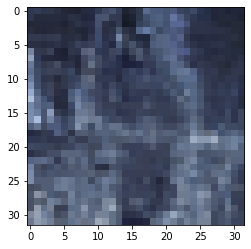

In [50]:
img = Image.open('_DEMO_Salt_Lake_City_2017_05_01.png')
img = img.resize((32,32))

# url = site + "lon=" + str(city['long']) + "&lat=" + str(city['lat']) + \
#     "&dim=.1&date=" + date + "&api_key=" + key1
# response = requests.get(url)
                    
#img = Image.open(BytesIO(response.content))
imgplot = plt.imshow(img)
plt.show()

In [51]:
img.save('_Salt_Lake_City_2017_05_01.png')